In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath

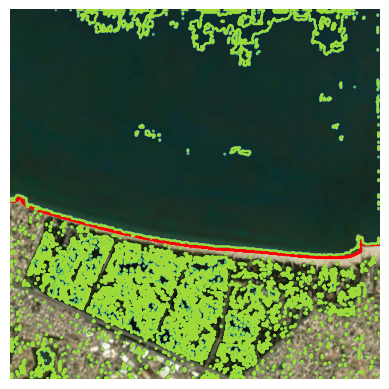

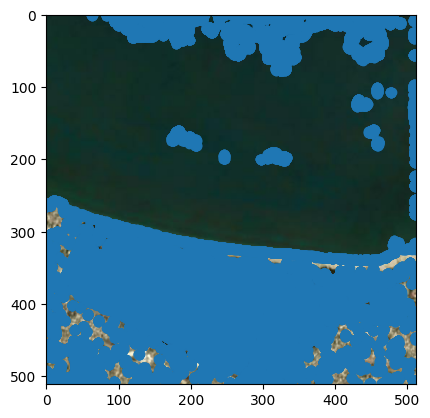

TypeError: 'zip' object is not subscriptable

In [53]:
image = np.load('Images/coasts-4_img.npy')
mask = np.load('Images/coasts-4_groundTruth.npy')
pred = np.load('Images/coasts-4_pred.npy')


cs_msk = plt.contour(mask[:,:,0], colors='red')
cs_pred = plt.contour(pred[:,:,0])
# plt.show()
plt.imshow(image)
plt.axis('off')
plt.show()

cont_len_msk = len(cs_msk.collections[0].get_paths()[0])
msk_vertices = cs_msk.allsegs[0][:][0]

pred_segs = cs_pred.allsegs
pred_x = []
pred_y = []

# Extract the coordinates of every single contour point (of prediction):
for i in range(len(pred_segs)):
   pred_elems = pred_segs[i]
   for j in range(len(pred_elems)):                         
      pred_vertices = pred_segs[i][j]
      xij= pred_vertices[:,0]                        
      yij = pred_vertices[:,1]
      pred_x = np.concatenate((pred_x, xij))
      pred_y = np.concatenate((pred_y, yij))

# IDEAS:
# 1. Find actual contour (the one approximating the coastline best) and calc. its distance from the ground truth contour
# 2. Iterate through every predicted contour pixel, calc. its distance from closest ground truth point, average & normalize

In [60]:
def closest_coordinate(point, contour_coordinates, d_max=512):

    min_distance = d_max
    for coord in contour_coordinates:
        distance = np.linalg.norm(np.array(point) - np.array(coord))
        if distance < min_distance:
            min_distance = distance
    
    return min_distance


contour_coordinates = [(x,y) for (x,y) in zip(msk_vertices[:,0],msk_vertices[:,1])]
distances_to_coastline = [closest_coordinate(point, contour_coordinates) for point in zip(pred_x, pred_y)] ### !!!! (very) long computation time, is there a more efficient way?

# print(distances_to_coastline)

[261.4287665885298, 260.24795868555816, 261.03064954139006, 266.48076853686837, 265.24328455212583, 264.9698096010185, 265.6633207652121, 272.02941017470886, 270.7508079396994, 270.4163456597992, 270.085171751431, 269.75729832573575, 269.4327374318125, 269.1115010548602, 268.79360111431225, 268.47904946196456, 268.1678578800972, 267.8600380795911, 267.5556016980396, 268.2088738278434, 279.47450688747983, 278.1726082848561, 277.80028797681257, 277.4310725207254, 277.0649743291274, 276.702005775166, 276.34217919094436, 275.98550686584974, 275.6320010448714, 275.2816739269071, 274.93453766305896, 274.5906043549196, 274.2498860528478, 273.9069184960467, 273.5434152013168, 273.18308878845335, 272.8259518447613, 272.472016911829, 272.12129648375554, 271.773803005367, 271.4295488704205, 272.02941017470886, 294.89320100673734, 293.53705047233814, 293.0614270080592, 292.5884481656786, 292.11812679120067, 291.6504757410829, 291.18550788114436, 290.7232360854564, 290.26367323521555, 289.806832217

[3.2133275392986698, 7.760070284159613, 13.75453446191052, 19.57423292019347, 25.593731106408708, 32.34016021765417, 39.18767004232164, 46.13862227932285, 52.55441354292624, 58.795911426844015, 64.32512091898428, 69.01262091898428, 73.02703672914147, 76.6933381197098, 80.00727403264813]


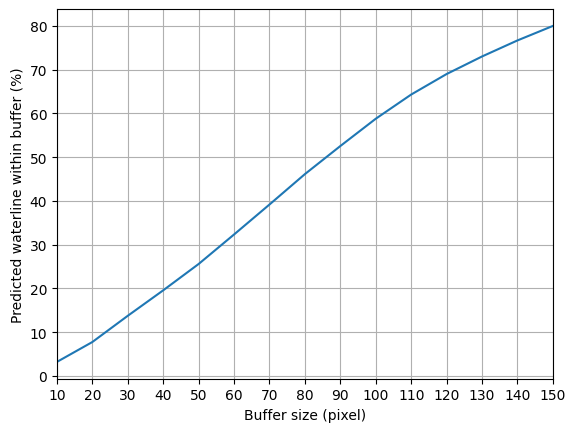

In [80]:
tot_points = len(distances_to_coastline)

buffer_list = np.arange(10, 160, 10)
part_per_buffer = []
for buffer in buffer_list:
    points_within_buffer = len([dist for dist in distances_to_coastline if dist <= buffer])
    part_per_buffer.append(points_within_buffer*100/tot_points)

print(part_per_buffer)

fig, ax = plt.subplots(1,1)
ax.plot(buffer_list, part_per_buffer)
ax.grid()
plt.xlabel('Buffer size (pixel)')
plt.ylabel('Predicted waterline within buffer (%)')
ax.set_xlim(buffer_list[0], buffer_list[-1])
ax.set_xticks(buffer_list)
plt.show()